In [3]:
!git init -q
!git config --local user.email "ssv273@yandex.ru"
!git config --local user.name "ssv-nsk"
!dvc init -q
!git commit -m "DVC init"

–¢–µ–∫—É—â–∞—è –≤–µ—Ç–∫–∞: main
–≠—Ç–∞ –≤–µ—Ç–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç ¬´origin/main¬ª.

–ù–µ–æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ–º—ã–µ —Ñ–∞–π–ª—ã:
  (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ ¬´git add <—Ñ–∞–π–ª>...¬ª, —á—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å –≤ —Ç–æ, —á—Ç–æ –±—É–¥–µ—Ç –≤–∫–ª—é—á–µ–Ω–æ –≤ –∫–æ–º–º–∏—Ç)
	.dvc/
	.dvcignore
	1.ipynb
	requirements.txt
	yolo11s.pt

–∏–Ω–¥–µ–∫—Å –ø—É—Å—Ç, –Ω–æ –µ—Å—Ç—å –Ω–µ–æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ–º—ã–µ —Ñ–∞–π–ª—ã
(–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ ¬´git add¬ª, —á—Ç–æ–±—ã –ø—Ä–æ–∏–Ω–¥–µ–∫—Å–∏—Ä–æ–≤–∞—Ç—å –∏—Ö)


In [4]:
!mkdir raw_data/raw_dataset
!unzip raw_data/test.v4i.yolov11.zip -d raw_data/raw_dataset
%pip install -r requirements.txt

Archive:  raw_data/test.v4i.yolov11.zip
  inflating: raw_data/raw_dataset/README.dataset.txt  
  inflating: raw_data/raw_dataset/README.roboflow.txt  
  inflating: raw_data/raw_dataset/data.yaml  
   creating: raw_data/raw_dataset/train/
   creating: raw_data/raw_dataset/train/images/
 extracting: raw_data/raw_dataset/train/images/1_MOV-0000_jpg.rf.97d4acb1d1e410965c65681b3d190a06.jpg  
 extracting: raw_data/raw_dataset/train/images/1_MOV-0004_jpg.rf.0bd7dc6ac54f9d9f1bb47a25222e6964.jpg  
 extracting: raw_data/raw_dataset/train/images/1_MOV-0005_jpg.rf.5b2475cc62caf564db3d748f692a6f68.jpg  
 extracting: raw_data/raw_dataset/train/images/1_MOV-0007_jpg.rf.b45279ed7e3241151188cb4ad8dcaed8.jpg  
 extracting: raw_data/raw_dataset/train/images/1_MOV-0009_jpg.rf.a13608a35dbe48091e7f5121dea4b2f6.jpg  
 extracting: raw_data/raw_dataset/train/images/1_MOV-0011_jpg.rf.637158bd8860f55e3b5747402ae00f9c.jpg  
 extracting: raw_data/raw_dataset/train/images/2_1_MOV-0000_jpg.rf.5ab96cd2b2737f20e486910

In [5]:
import os
import random
import shutil
import yaml

import albumentations as A
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import imageio.v2 as imageio
from PIL import Image
from ultralytics import YOLO



# Augmentation

In [6]:
# –¥–ª—è –Ω–∞—á–∞–ª–∞ —Å—á–∏—Ç–∞–µ–º –≤—Å–µ –∏–º–µ–Ω–∞ —Ñ–∞–π–ª–æ–≤ –∏ –∏—Ö –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π –≤ pandas.DataFrame
images_path = "./raw_data/raw_dataset/train/images/"
annot_path = "./raw_data/raw_dataset/train/labels/"

images = sorted([i for i in os.listdir(images_path) if i.endswith(".jpg")])
annot = sorted([i for i in os.listdir(annot_path) if i.endswith(".txt")])
print("–í—Å–µ–≥–æ —Ñ–∞–π–ª–æ–≤: ", len(images))
print("–í—Å–µ–≥–æ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π: ", len(annot))

–í—Å–µ–≥–æ —Ñ–∞–π–ª–æ–≤:  90
–í—Å–µ–≥–æ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π:  90


In [7]:
img_df = pd.DataFrame(data=images, columns=['img_name'])
img_df['annot_name'] = annot
img_df.head(2)

img_name  \
0  1_MOV-0000_jpg.rf.97d4acb1d1e410965c65681b3d19...   
1  1_MOV-0004_jpg.rf.0bd7dc6ac54f9d9f1bb47a25222e...   

                                          annot_name  
0  1_MOV-0000_jpg.rf.97d4acb1d1e410965c65681b3d19...  
1  1_MOV-0004_jpg.rf.0bd7dc6ac54f9d9f1bb47a25222e...

#### –æ–ø—Ä–µ–¥–µ–ª–∏–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏

In [8]:
BOX_COLOR = (255, 0, 0)  # Red
TEXT_COLOR = (255, 255, 255)  # White

In [9]:
def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x, y, w, h = bbox
    dh, dw, _ = img.shape


    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (l, t - int(1.3 * text_height)), (l + text_width, t), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(l, t - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img

In [10]:
def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        if category_id == '1':
            img = visualize_bbox(img, bbox, class_name)
        else:
            img = visualize_bbox(img, bbox, class_name, color=(255, 255, 0))

    return img

#### –û–ø—Ä–µ–¥–µ–ª–∏–º –ø–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–π

In [11]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5),
     A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.SquareSymmetry(p=0.5),
    A.OneOf([
        A.ToGray(p=0.1),
        A.ChannelDropout(p=0.1)
    ], p=0.2),
    A.ColorJitter(p=0.1)],
    bbox_params=A.BboxParams(format="yolo", label_fields=["category_ids"]),
    strict=True,
    seed=137,
)

/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


#### –í–æ–∑—å–º—ë–º —Å–ª—É—á–∞–π–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –µ–≥–æ –±–∞—É–Ω–¥–∏–Ω–≥ –±–æ–∫—Å—ã

In [44]:
category_id_to_name = {'2': "cup/saucer", '1': "teapot", "0": 'borsch', "3": 'meat',
                      "4": "salad", "5": "salad_2", "6": "soup"}

In [ ]:
random_image = img_df.sample(1)
img = imageio.imread(images_path + random_image.values[0][0])
with open(annot_path + random_image.values[0][1], "r") as f:
    raw_bbxs = f.readlines()
    
category_ids = []
bboxes = []
for line in raw_bbxs:
    bb_ = line.strip().split()
    category_ids.append(bb_[0])
    bboxes.append([float(x) for x in bb_[1:]])
['borsch', 'glass teapot', 'glass_cape', 'meat', 'salad', 'salad_2', 'soup']


#### –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏

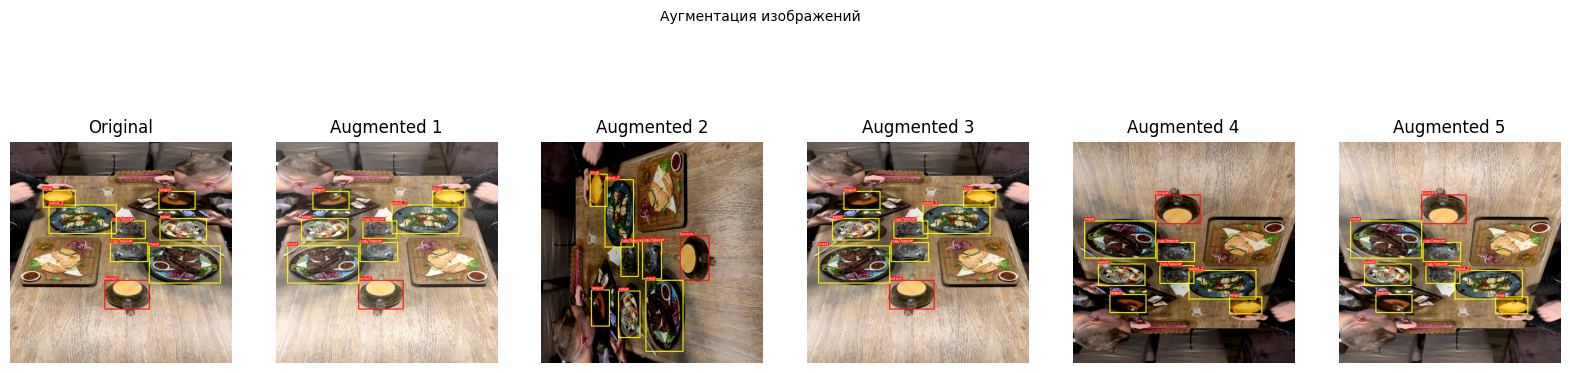

In [13]:
samples = 5
figure, ax = plt.subplots(1, samples + 1, figsize=(20, 5))
figure.suptitle('–ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π', fontsize=10)

ax[0].imshow(visualize(img, bboxes, category_ids, category_id_to_name))
ax[0].set_title("Original")
ax[0].axis("off")

# Draw augmented samples
for i in range(samples):
    try:
        transformed = transform(image=img, bboxes=bboxes, category_ids=category_ids)
        ax[i+1].imshow(visualize(
                    transformed["image"],
                    transformed["bboxes"],
                    transformed["category_ids"],
                    category_id_to_name,
                ))
        ax[i+1].set_title(f"Augmented {i+1}")
    except Exception as e:
        print(f"Error during augmentation sample {i+1}: {e}")
        ax[i+1].imshow(img) # Show original on error
        ax[i+1].set_title(f"Aug Error {i+1}")
    finally:
        ax[i+1].axis("off")


#### –¢–µ–ø–µ—Ä—å –∫ –∫–∞–∂–¥–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é –ø—Ä–∏–º–µ–Ω–∏–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –¥–≤–∞ —Ä–∞–∑–∞, —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —É–≤–µ–ª–∏—á–∏—Ç—Å—è –≤ —Ç—Ä–∏ —Ä–∞–∑–∞

In [14]:
# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
directory = './raw_data/dataset/augmented_images/'
directory_labels = './raw_data/dataset/augmented_labels/'
os.makedirs(directory, exist_ok=True)
os.makedirs(directory_labels, exist_ok=True)

In [15]:
def save_data(img, category_ids, bboxes, save_image_name, save_annot_name, file_directory=directory, annot_directory=directory_labels):
    """
    save image and annotations
    """
    img_to_save = Image.fromarray(img)
    image_path_to_save = os.path.join(file_directory, save_image_name)
    img_to_save.save(image_path_to_save)

    annot_path_to_write = os.path.join(annot_directory, save_annot_name)
    with open(annot_path_to_write, 'w') as file:
        for i in range(len(category_ids)):
            ann = list(category_ids[i])
            ann.extend(bboxes[i])
            # print(ann)
            file.write(' '.join(map(str, ann)) + '\n')


In [16]:
for i in img_df.iterrows():
    # —Å–Ω–∞—á–∞–ª–∞ –ø—Ä–æ—Å—Ç–æ –∫–æ–ø–∏—Ä—É–µ–º –æ—Ä–∏–≥–∏–Ω–∞–π–ª—å–Ω—ã–π —Ñ–∞–π–ª –≤ –Ω–æ–≤—É—é –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é
    file_path = images_path + i[1]['img_name']
    destination_dir = directory
    annot_file_path = annot_path + i[1]['annot_name']
    annot_destination_dir = directory_labels
    
    shutil.copy(file_path, destination_dir)
    shutil.copy(annot_file_path, annot_destination_dir)

    # —Å—á–∏—Ç—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ
    img = imageio.imread(file_path)

    with open(annot_file_path, "r") as f:
        raw_bbxs = f.readlines()
        
    category_ids = []
    bboxes = []
    for line in raw_bbxs:
        bb_ = line.strip().split()
        category_ids.append(bb_[0])
        bboxes.append([float(x) for x in bb_[1:]])

    # —Ç–µ–ø–µ—Ä—å –ø—Ä–∏–º–µ–Ω—è–µ–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∫ –∏—Å—Ö–æ–¥–Ω–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é –¥–≤–∞ —Ä–∞–∑–∞, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Ç—Ä–∏ —Ä–∞–∑–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ –æ–¥–Ω–æ–≥–æ
    for j in range(2):
        transformed = transform(image=img, bboxes=bboxes, category_ids=category_ids)
        new_image_name = i[1]['img_name'].split(".jpg")[0] + f"_{j}.jpg"
        new_annot_name = i[1]['annot_name'].split(".txt")[0] + f"_{j}.txt"
        save_data(transformed["image"], 
                  transformed["category_ids"], 
                  transformed["bboxes"], 
                  new_image_name, 
                  new_annot_name
                  )

#### –ø—Ä–æ–≤–µ—Ä–∫–∞

In [17]:
# –ø—Ä–æ–≤–µ—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –≤ –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å —Ñ–∞–π–ª–æ–≤

images = sorted([i for i in os.listdir(directory) if i.endswith(".jpg")])
annot = sorted([i for i in os.listdir(directory_labels) if i.endswith(".txt")])
print("–í—Å–µ–≥–æ —Ñ–∞–π–ª–æ–≤: ", len(images))
print("–í—Å–µ–≥–æ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π: ", len(annot))

–í—Å–µ–≥–æ —Ñ–∞–π–ª–æ–≤:  270
–í—Å–µ–≥–æ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π:  270


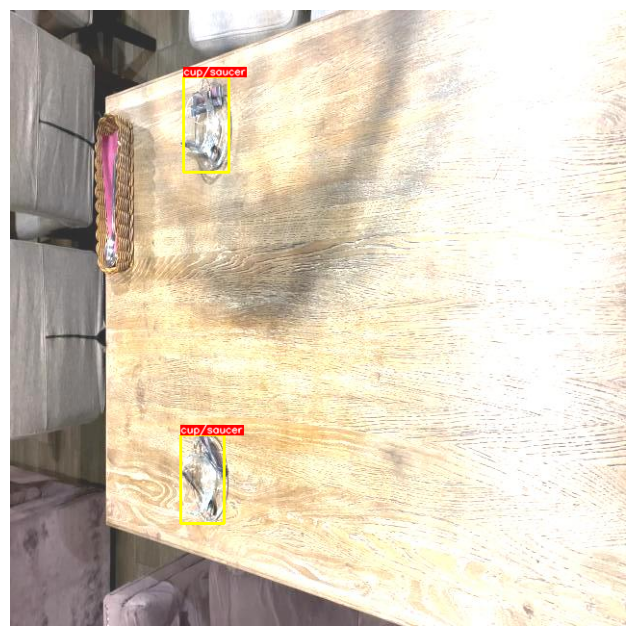

In [18]:
img = imageio.imread("raw_data/dataset/augmented_images/1_MOV-0000_jpg.rf.97d4acb1d1e410965c65681b3d190a06_0.jpg")
with open("raw_data/dataset/augmented_labels/1_MOV-0000_jpg.rf.97d4acb1d1e410965c65681b3d190a06_0.txt", "r") as f:
    raw_bbxs = f.readlines()
    
category_ids = []
bboxes = []
for line in raw_bbxs:
    bb_ = line.strip().split()
    category_ids.append(bb_[0])
    bboxes.append([float(x) for x in bb_[1:]])

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(visualize(img,bboxes, category_ids, category_id_to_name));

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/val/test

In [19]:
# –ó–∞–¥–∞–µ–º –ø—É—Ç–∏ –∫ –∏—Å—Ö–æ–¥–Ω—ã–º –∏ —Ü–µ–ª–µ–≤—ã–º –ø–∞–ø–∫–∞–º
dataset_path = './raw_data/dataset'
augmented_images_path = os.path.join(dataset_path, 'augmented_images')
augmented_labels_path = os.path.join(dataset_path, 'augmented_labels')
final_dataset_path = 'datasets'

In [20]:
# –°–æ–∑–¥–∞–µ–º —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –ø–∞–ø–∫–∏
os.makedirs(os.path.join(final_dataset_path, 'train', 'images'), exist_ok=True)
os.makedirs(os.path.join(final_dataset_path, 'train', 'labels'), exist_ok=True)
os.makedirs(os.path.join(final_dataset_path, 'valid', 'images'), exist_ok=True)
os.makedirs(os.path.join(final_dataset_path, 'valid', 'labels'), exist_ok=True)
os.makedirs(os.path.join(final_dataset_path, 'test', 'images'), exist_ok=True)
os.makedirs(os.path.join(final_dataset_path, 'test', 'labels'), exist_ok=True)

In [21]:
# –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
image_files = [f for f in os.listdir(augmented_images_path) if f.endswith('.jpg')]

# –ü–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º —Å–ø–∏—Å–æ–∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
random.shuffle(image_files)

In [22]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ä–∞–∑–º–µ—Ä—ã –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è
total_images = len(image_files)
train_size = int(total_images * 0.7)
valid_size = int(total_images * 0.2)

# –ü–æ–ª—É—á–∞–µ–º —Ñ–∞–π–ª—ã –¥–ª—è –∫–∞–∂–¥–æ–π —á–∞—Å—Ç–∏
train_files = image_files[:train_size]
valid_files = image_files[train_size:train_size + valid_size]
test_files = image_files[train_size + valid_size:]
print("total files: ", len(train_files) + len(valid_files) + len(test_files))

total files:  270


In [23]:
def copy_files(files, src_dir, dest_dir):
    for file in files:
        # –ö–æ–ø–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        shutil.copy(os.path.join(src_dir, file), os.path.join(dest_dir, file))
        # –ö–æ–ø–∏—Ä—É–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π —Ñ–∞–π–ª .txt
        label_file = file.replace('.jpg', '.txt')
        shutil.copy(os.path.join(augmented_labels_path, label_file), os.path.join(dest_dir.replace('images', 'labels'), label_file))

In [24]:
# –ö–æ–ø–∏—Ä—É–µ–º —Ñ–∞–π–ª—ã –≤ –Ω—É–∂–Ω—ã–µ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏
copy_files(train_files, augmented_images_path, os.path.join(final_dataset_path, 'train', 'images'))
copy_files(valid_files, augmented_images_path, os.path.join(final_dataset_path, 'valid', 'images'))
copy_files(test_files, augmented_images_path, os.path.join(final_dataset_path, 'test', 'images'))

### –¥–ª—è –∑–∞–ø—É—Å–∫–∞ –æ–±—É—á–µ–Ω–∏—è –µ—â–µ –Ω—É–∂–µ–Ω —Ñ–∞–π–ª–∏–∫ .yaml —Å –º–µ—Ç–∞–¥–∞–Ω–Ω—ã–º–∏

In [25]:
data = {
    'train': '../train/images',
    'val': '../valid/images',
    'test': '../test/images',
    'nc': 7,
    'names': ['borsch', 'glass_teapot', 'cup/saucer', 'meat', 'salad', 'salad_2', 'soup']
}

with open(final_dataset_path + '/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

In [26]:
# —É–¥–∞–ª—è–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
!rm -rf raw_data/raw_dataset
!rm -rf raw_data/dataset

# –ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è

In [27]:
HOME = os.getcwd()
dataset_location = HOME + "/datasets"
dataset_location

'/media/ssv/SHARED/Zebra_test/test_zebra/datasets'

In [28]:
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
Setup complete ‚úÖ (8 CPUs, 15.5 GB RAM, 140.6/191.4 GB disk)


## Baseline
#### –≤ –∫–∞—á–µ—Å—Ç–≤–µ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ç–æ—á–∫–∏ –æ—Ç—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫ –≤–æ–∑—å–º–µ–º –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è YOLO –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é

In [29]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset_location}/data.yaml epochs=10 imgsz=640 plots=True

/media/ssv/SHARED/Zebra_test/test_zebra
New https://pypi.org/project/ultralytics/8.3.161 available üòÉ Update with 'pip install -U ultralytics'
/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy

#### –ø–æ–ø—Ä–æ–±—É–µ–º –∏–∑–º–µ–Ω–∏—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã

In [30]:
%cd {HOME}
# –¥–æ–±–∞–≤–∏–º –¥—Ä–æ–ø–∞—É—Ç –∏ –ø–æ–º–µ–Ω—è–µ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä –∏ learning rate –≤–º–µ—Å—Ç–µ —Å –º–æ–º–µ–Ω—Ç–æ–º –∏–Ω–µ—Ä—Ü–∏–∏
# –¥—Ä–æ–ø–∞—É—Ç –∑–∞—Å—Ç–∞–≤–∏—Ç –º–æ–¥–µ–ª—å –±–æ–ª—å—à–µ –≥–µ–Ω–µ—Ä–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∞ –Ω–µ –∑–∞—É—á–∏–≤–∞—Ç—å –∏—Ö
# learning rate –≤–º–µ—Å—Ç–µ —Å –º–æ–º–µ–Ω—Ç–æ–º –∏–Ω–µ—Ä—Ü–∏–∏ –º—ã —É–º–µ–Ω—å—à–∏–º, –¥–ª—è –±–æ–ª–µ–µ –ø–ª–∞–≤–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –≤ –≥–ª–æ–±–∞–ª—å–Ω—ã–π –º–∏–Ω–∏–º—É–º
!yolo task=detect mode=train model=yolo11s.pt data={dataset_location}/data.yaml epochs=10 imgsz=640 plots=True dropout=0.1 optimizer=Adam lr0=0.001 momentum=0.85

/media/ssv/SHARED/Zebra_test/test_zebra
New https://pypi.org/project/ultralytics/8.3.161 available üòÉ Update with 'pip install -U ultralytics'
/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy

#### –ø–æ–ø—Ä–æ–±—É–µ–º –±–æ–ª–µ–µ —Ç—è–∂–µ–ª—É—é –º–æ–¥–µ–ª—å

In [31]:
!yolo task=detect mode=train model=yolo11m.pt data={dataset_location}/data.yaml epochs=10 imgsz=640 plots=True

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 38.8M/38.8M [00:02<00:00, 14.6MB/s]
New https://pypi.org/project/ultralytics/8.3.161 available üòÉ Update with 'pip install -U ultralytics'
/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=ra

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

In [32]:
# –≤–æ–∑—å–º–µ–º –±–∞–∑–æ–≤—É—é –º–æ–¥–µ–ª—å
model = YOLO('./runs/detect/train/weights/best.pt')

In [33]:
# –¥–ª—è –Ω–∞—á–∞–ª–∞ —Å—á–∏—Ç–∞–µ–º –≤—Å–µ –∏–º–µ–Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–æ–≤ –∏ –∏—Ö –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π –≤ pandas.DataFrame
images_path = "./datasets/test/images/"
annot_path = "./datasets/test/labels/"

test_images = sorted([i for i in os.listdir(images_path) if i.endswith(".jpg")])
test_annot = sorted([i for i in os.listdir(annot_path) if i.endswith(".txt")])
print("–í—Å–µ–≥–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–æ–≤: ", len(test_images))
print("–í—Å–µ–≥–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π: ", len(test_annot))

–í—Å–µ–≥–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–æ–≤:  27
–í—Å–µ–≥–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π:  27


In [34]:
test_img_df = pd.DataFrame(data=test_images, columns=['img_name'])
test_img_df['annot_name'] = test_annot
test_img_df.head(2)

img_name  \
0  1_MOV-0005_jpg.rf.5b2475cc62caf564db3d748f692a...   
1  1_MOV-0007_jpg.rf.b45279ed7e3241151188cb4ad8dc...   

                                          annot_name  
0  1_MOV-0005_jpg.rf.5b2475cc62caf564db3d748f692a...  
1  1_MOV-0007_jpg.rf.b45279ed7e3241151188cb4ad8dc...

In [46]:
random_image = test_img_df.sample(1)
img = imageio.imread(images_path + random_image.values[0][0])
with open(annot_path + random_image.values[0][1], "r") as f:
    raw_bbxs = f.readlines()
    
test_category_ids = []
test_bboxes = []
for line in raw_bbxs:
    bb_ = line.strip().split()
    test_category_ids.append(bb_[0])
    test_bboxes.append([float(x) for x in bb_[1:]])


In [47]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏
results = model.predict(source=img, conf=0.5, save=False, device="cpu")


0: 640x640 1 borsch, 1 glass_teapot, 2 cup/saucers, 1 meat, 1 salad, 1 salad_2, 1 soup, 325.7ms
Speed: 24.5ms preprocess, 325.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


In [48]:
# –±–∞—É–Ω–¥–∏–Ω–≥ –±–æ–∫—Å—ã —Ö—Ä–∞–Ω—è—Ç—Å—è —Ç—É—Ç
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 0., 2., 1., 6., 5., 3., 4.])
conf: tensor([0.9376, 0.9287, 0.9239, 0.9175, 0.8372, 0.8360, 0.8179, 0.8044])
data: tensor([[291.5813, 231.2324, 389.8320, 281.1725,   0.9376,   2.0000],
        [449.6292, 147.0028, 553.8350, 200.9594,   0.9287,   0.0000],
        [286.1319, 293.9812, 397.0957, 349.0070,   0.9239,   2.0000],
        [274.0567, 400.7424, 400.1512, 486.0558,   0.9175,   1.0000],
        [110.1653, 147.2186, 201.7391, 196.4452,   0.8372,   6.0000],
        [ 59.8803, 197.7865, 260.1179, 276.6104,   0.8360,   5.0000],
        [396.9183, 303.9938, 602.0054, 409.9304,   0.8179,   3.0000],
        [430.9368, 223.7780, 567.4827, 285.0471,   0.8044,   4.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([8, 6])
xywh: tensor([[340.7067, 256.2025,  98.2507,  49.9402],
        [501.7321, 173.9811, 104.2057,  53.9565],
        [341.6138, 321.4941, 110.9638,  55.0258],
        [337.1040, 4

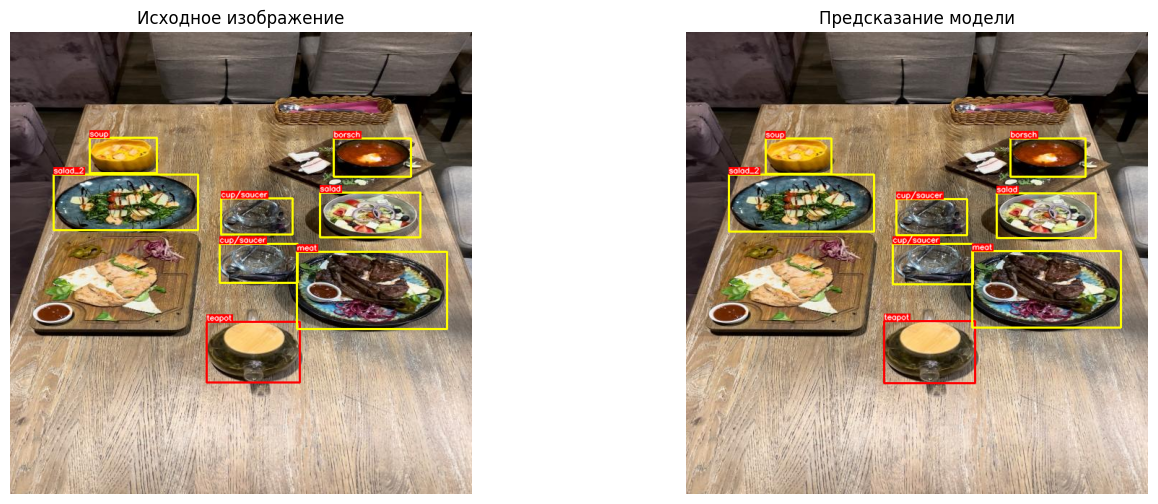

In [49]:
# –æ—Ç—Ä–∏—Å—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.imshow(visualize(img,
                     test_bboxes, 
                     test_category_ids, 
                     category_id_to_name))
ax1.set_title('–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ')
ax1.axis("off")

ax2.imshow(visualize(img,
                     results[0].boxes.xywhn.cpu().numpy(), 
                     results[0].boxes.cls.cpu().numpy().astype("int").astype("str"), 
                     category_id_to_name))
ax2.set_title('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏')
ax2.axis("off");

# –ú–µ—Ç—Ä–∏–∫–∏

In [50]:
baseline_model = YOLO('./runs/detect/train/weights/best.pt')
baseline_metrics = baseline_model.val(data="./datasets/data.yaml", split='test', verbose=False, name='baseline')

model_1 = YOLO('./runs/detect/train2/weights/best.pt')
metrics_1 = model_1.val(data="./datasets/data.yaml", split='test', verbose=False, name='model_1')

model_2 = YOLO('./runs/detect/train3/weights/best.pt')
metrics_2 = model_2.val(data="./datasets/data.yaml", split='test', verbose=False, name='model_2')

Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 760.7¬±910.4 MB/s, size: 82.2 KB)


val: Scanning /media/ssv/SHARED/Zebra_test/test_zebra/datasets/test/labels... 27

val: New cache created: /media/ssv/SHARED/Zebra_test/test_zebra/datasets/test/labels.cache



/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         27        150      0.933      0.988      0.965      0.913
Speed: 2.1ms preprocess, 222.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/baseline
Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 2101.6¬±595.1 MB/s, size: 76.5 KB)


val: Scanning /media/ssv/SHARED/Zebra_test/test_zebra/datasets/test/labels.cache
/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         27        150      0.922      0.979      0.972      0.901
Speed: 1.9ms preprocess, 203.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/model_1
Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
YOLO11m summary (fused): 125 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 2486.0¬±344.5 MB/s, size: 81.8 KB)


val: Scanning /media/ssv/SHARED/Zebra_test/test_zebra/datasets/test/labels.cache
/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         27        150       0.92      0.988      0.969        0.9
Speed: 3.0ms preprocess, 499.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/model_2


#### –∑–¥–µ—Å—å –ª–µ–∂–∞—Ç –≤—Å–µ –º–µ—Ç—Ä–∏–∫–∏

In [51]:
baseline_metrics

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4866316490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

#### –º–æ–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –≥—Ä–∞—Ñ–∏–∫–∏

In [52]:
baseline_metrics.curves

['Precision-Recall(B)',
 'F1-Confidence(B)',
 'Precision-Confidence(B)',
 'Recall-Confidence(B)']

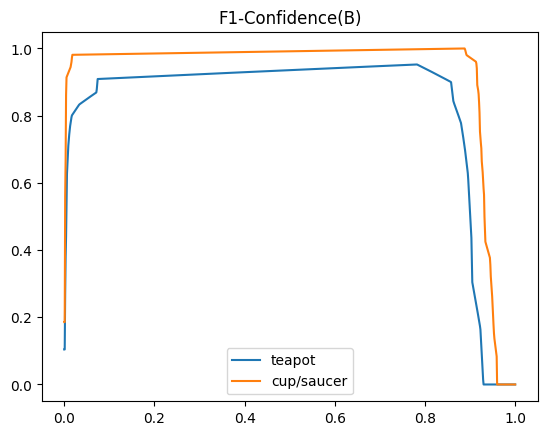

In [53]:
# –Ω–∞–ø—Ä–∏–º–µ—Ä –ø–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è 'F1-Confidence(B)'

plt.plot(baseline_metrics.curves_results[1][0], baseline_metrics.curves_results[1][1][0], label='teapot')
plt.plot(baseline_metrics.curves_results[1][0], baseline_metrics.curves_results[1][1][1], label='cup/saucer')
plt.title(baseline_metrics.curves[1])
plt.legend()
plt.show()


–∏–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –≤ –±–æ–ª–µ–µ –ø—Ä–µ–∑–µ–Ω—Ç–∞–±–µ–ª—å–Ω–æ–º –≤–∏–¥–µ   
<img src="./runs/detect/baseline/F1_curve.png" alt="–æ–ø–∏—Å–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è" width="50%">  


## –¥–ª—è –±–æ–ª–µ–µ —É–¥–æ–±–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –µ—Å—Ç—å dvclive

#### –∑–¥–µ—Å—å –º—ã –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤—Å–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ –≤—Å–µ–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–º –Ω–∞–≥–ª—è–¥–Ω–æ

In [54]:
import dvc.api
import pandas as pd

# Define the columns of interest
columns = ["Experiment", "model", 'metrics.precision(B)', 
           'metrics.recall(B)', 'metrics.mAP50(B)', "metrics.mAP50-95(B)"]

# Retrieve experiment data
df = pd.DataFrame(dvc.api.exp_show(), columns=columns)

# Clean the data
df.dropna(inplace=True)

# Display the DataFrame
df.sort_index(ascending=False).reset_index(drop=True)

Experiment       model  metrics.precision(B)  metrics.recall(B)  \
0  shyer-suqs  yolo11s.pt              0.906350           0.992294   
1  honey-lama  yolo11s.pt              0.915816           0.982604   
2  buggy-tilt  yolo11s.pt              0.932426           0.982732   
3  wrong-phon  yolo11m.pt              0.939448           0.937320   

   metrics.mAP50(B)  metrics.mAP50-95(B)  
0          0.950838             0.870629  
1          0.971082             0.886844  
2          0.977535             0.903056  
3          0.976915             0.882909

In [55]:
# Generate DVC comparative plots
!dvc plots diff $(dvc exp list --names-only)

file:///media/ssv/SHARED/Zebra_test/test_zebra/dvc_plots/index.html             


In [56]:
from IPython.display import HTML

# Display the DVC plots as HTML
HTML(filename="./dvc_plots/index.html")

#### –∫—Ä–∞—Ç–∫–∏–π –∞–Ω–∞–ª–∏–∑ –º–µ—Ç—Ä–∏–∫

In [57]:
baseline_metrics.results_dict

{'metrics/precision(B)': np.float64(0.932741114403947),
 'metrics/recall(B)': np.float64(0.9879969256280274),
 'metrics/mAP50(B)': np.float64(0.9650836570929383),
 'metrics/mAP50-95(B)': np.float64(0.9132147057636849),
 'fitness': np.float64(0.9184016008966103)}

In [60]:
res_df = pd.DataFrame([baseline_metrics.results_dict, metrics_1.results_dict,  metrics_2.results_dict])
res_df['model'] = ['baseline', 'model_1', 'model_2']
res_df[['model', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'fitness']]

model  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0  baseline              0.932741           0.987997          0.965084   
1   model_1              0.922020           0.979027          0.972236   
2   model_2              0.919973           0.987607          0.968981   

   metrics/mAP50-95(B)   fitness  
0             0.913215  0.918402  
1             0.901101  0.908214  
2             0.899757  0.906679

–ê–Ω–∞–ª–∏–∑–∏—Ä—É—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç—Ä—ë—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –ø–æ –¥–µ—Ç–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—é –æ–±—ä–µ–∫—Ç–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º–∞ YOLO, –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:

‚ñå –û—Å–Ω–æ–≤–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏:

- Precision ‚Äî –¥–æ–ª—è –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –æ–±–Ω–∞—Ä—É–∂–µ–Ω–Ω—ã—Ö (—á–µ–º –±–ª–∏–∂–µ –∫ 1, —Ç–µ–º –ª—É—á—à–µ).
- Recall ‚Äî –¥–æ–ª—è –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ —É—Å–ø–µ—à–Ω–æ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã –º–æ–¥–µ–ª—å—é (—á–µ–º –±–ª–∏–∂–µ –∫ 1, —Ç–µ–º –ª—É—á—à–µ).
- mAP50 ‚Äî —Å—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –ø—Ä–∏ IoU=0.5 (–≤–∞–∂–Ω–µ–π—à–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –æ–±—â–µ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏).
- mAP50-95 ‚Äî —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ mAP –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –ø–æ—Ä–æ–≥–∞—Ö IoU –æ—Ç 0.5 –¥–æ 0.95 (–æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∫ —Ä–∞–∑–ª–∏—á–Ω—ã–º —É—Ä–æ–≤–Ω—è–º –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏–π –º–µ–∂–¥—É –æ–±—ä–µ–∫—Ç–∞–º–∏).
- Fitness ‚Äî –∏–Ω—Ç–µ–≥—Ä–∞–ª—å–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏, –æ–±—ä–µ–¥–∏–Ω—è—é—â–∏–π Precision, Recall –∏ mAP.

‚ñå –í—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:

‚ñå 1. Baseline vs Model\_1

- –ú–æ–¥–µ–ª—å Baseline –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è precision –∏ recall, –æ–¥–Ω–∞–∫–æ –µ—ë mAP50 –Ω–∏–∂–µ, —á–µ–º —É Model\_1. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Ö–æ—Ç—è –±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å —Ç–æ—á–Ω–µ–µ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –æ–±—ä–µ–∫—Ç—ã –∏ —Ä–µ–∂–µ –¥–µ–ª–∞–µ—Ç –ª–æ–∂–Ω—ã–µ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏—è, –µ—ë –æ–±—â–∞—è —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –Ω–∞—Ö–æ–¥–∏—Ç—å –≤—Å–µ –æ–±—ä–µ–∫—Ç—ã —Ö—É–∂–µ, —á–µ–º —É –ø–µ—Ä–≤–æ–π –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–∏ (Model\_1). –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, Model\_1 —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–æ–π –±–ª–∞–≥–æ–¥–∞—Ä—è –ª—É—á—à–µ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞—Ç—å –±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –ø—Ä–∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–∏ –ø—Ä–∏–µ–º–ª–µ–º–æ–≥–æ —É—Ä–æ–≤–Ω—è —Ç–æ—á–Ω–æ—Å—Ç–∏.

‚ñå 2. Baseline vs Model\_2

- Model\_2, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Å—Ö–æ–∂–µ–µ –≤—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ recall, –∏–º–µ–µ—Ç –∑–∞–º–µ—Ç–Ω–æ —Ö—É–¥—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ mAP50 –∏ mAP50-95 –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏. –ï—ë –∏–Ω—Ç–µ–≥—Ä–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ Fitness —Ç–∞–∫–∂–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Ö–æ—Ç—è –º–æ–¥–µ–ª—å –Ω–∞—Ö–æ–¥–∏—Ç –ø–æ—á—Ç–∏ —Å—Ç–æ–ª—å–∫–æ –∂–µ –æ–±—ä–µ–∫—Ç–æ–≤, –∫–∞–∫ –∏ –±–∞–∑–æ–≤–∞—è –≤–µ—Ä—Å–∏—è, –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—â–µ–≥–æ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ, –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –ø–æ—Ä–æ–≥–∞ –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏—è (IoU), —á—Ç–æ —Å–Ω–∏–∂–∞–µ—Ç –æ–±—â—É—é –ø–æ–ª–µ–∑–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

‚ñå 3. Model\_1 vs Model\_2

- –ú–µ–∂–¥—É —ç—Ç–∏–º–∏ –¥–≤—É–º—è –º–æ–¥–µ–ª—è–º–∏ —Ä–∞–∑–Ω–∏—Ü–∞ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —É—Ä–æ–≤–Ω–µ mAP50 –∏ mAP50-95. –•–æ—Ç—è –æ–±–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –±–ª–∏–∑–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è precision –∏ recall, –ø–µ—Ä–≤–∞—è –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–∏—Ç –≤—Ç–æ—Ä—É—é –ø–æ –æ–±—â–µ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –æ–±—ä–µ–∫—Ç–æ–≤ –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö —É—Ä–æ–≤–Ω—è—Ö –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏—è. –ò–º–µ–Ω–Ω–æ –ø–æ—ç—Ç–æ–º—É Model\_1 –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –ª—É—á—à–µ–µ –æ–±—â–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –∏ –¥–æ–ª–∂–Ω–∞ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å—Å—è –∫–∞–∫ –Ω–∞–∏–±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–∞—è –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è.

‚ñå –ò—Ç–æ–≥–∏:

–ò—Å—Ö–æ–¥—è –∏–∑ –∞–Ω–∞–ª–∏–∑–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫, –Ω–∞–∏–ª—É—á—à–µ–π –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è Model\_1, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∞ –æ–±–µ—Å–ø–µ—á–∏–≤–∞–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —Å–æ—á–µ—Ç–∞–Ω–∏–µ –≤—ã—Å–æ–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ (precision), –ø–æ–ª–Ω–æ—Ç—ã (recall) –∏ —Ö–æ—Ä–æ—à–µ–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (mAP50 –∏ mAP50-95), —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –µ—ë –ø—Ä–µ–≤–æ—Å—Ö–æ–¥—Å—Ç–≤–æ –Ω–∞–¥ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –≤–∞—Ä–∏–∞–Ω—Ç–∞–º–∏ –º–æ–¥–µ–ª–µ–π.

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

–≤ YOLO –µ—Å—Ç—å –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –ø–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥–µ–Ω–µ—Ç–∏—á–µ—Å–∫–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤.  
–†–∞–Ω—å—à–µ —è –¥–µ–ª–∞–ª —ç—Ç–æ –≤—Ä—É—á–Ω—É—é (https://github.com/ssv-nsk/genetic/blob/main/%D0%93%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B%20%D0%B4%D0%BB%D1%8F%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85%20%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb)

In [ ]:
# –ø–æ–ø—Ä–æ–±—É–µ–º –µ—â–µ –Ω–µ–º–Ω–æ–≥–æ –æ–ø—Ä—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å 1
model_1 = YOLO('./runs/detect/train2/weights/best.pt')

# Define search space
search_space = {
    "lr0": (1e-5, 1e-1),
    "momentum": (0.7, 0.98),
     "degrees": (0.0, 45.0), # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –ø–æ–≤–æ—Ä–æ—Ç–∞ –≤ –≥—Ä–∞–¥—É—Å–∞—Ö. –ü–æ–º–æ–≥–∞–µ—Ç –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç—å –∏–Ω–≤–∞—Ä–∏–∞–Ω—Ç–Ω–æ–π –∫ –æ—Ä–∏–µ–Ω—Ç–∞—Ü–∏–∏ –æ–±—ä–µ–∫—Ç–∞
}

# Tune hyperparameters for 10 epochs
model_1.tune(
    data="./datasets/data.yaml",
    epochs=10,
    iterations=100,
    optimizer="Adam",
    space=search_space,
    plots=True,
    save=True,
    val=True,
)

–≤—ã—Ä–µ–∑–∞–Ω –≤—ã—Ö–æ–¥ —ç—Ç–æ–π —è—á–µ–π–∫–∏, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π

In [66]:
tuned_model_1 = YOLO('./runs/detect/tune2/weights/best.pt')
tuned_metrics_1 = tuned_model_1.val(data="./datasets/data.yaml", split='test', verbose=False, name='tuned_model_1')

Ultralytics 8.3.159 üöÄ Python-3.11.11 torch-2.7.1+cu126 CPU (Intel Core(TM) i7-8550U 1.80GHz)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 372.5¬±44.5 MB/s, size: 84.2 KB)


val: Scanning /media/ssv/SHARED/Zebra_test/test_zebra/datasets/test/labels.cache
/media/ssv/SHARED/Zebra_test/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         27        150      0.949      0.961      0.978       0.93
Speed: 1.9ms preprocess, 281.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/tuned_model_12


In [67]:
res_df = pd.DataFrame([baseline_metrics.results_dict, metrics_1.results_dict,  
                       metrics_2.results_dict, tuned_metrics_1.results_dict])
res_df['model'] = ['baseline', 'model_1', 'model_2', 'tuned_metrics_1']
res_df[['model', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'fitness']]

model  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0         baseline              0.932741           0.987997          0.965084   
1          model_1              0.922020           0.979027          0.972236   
2          model_2              0.919973           0.987607          0.968981   
3  tuned_metrics_1              0.949235           0.961105          0.978213   

   metrics/mAP50-95(B)   fitness  
0             0.913215  0.918402  
1             0.901101  0.908214  
2             0.899757  0.906679  
3             0.930258  0.935054

–ü–æ—Å–ª–µ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ tuned_model_1 –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø–æ–≤—ã—Å–∏–ª–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å baseline (–Ω–∞ 0.016494 –≤ precision) –∏ –¥–æ–≤–æ–ª—å–Ω–æ –±–ª–∏–∑–∫–∞ –∫ baseline –ø–æ recall. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –∏ —É–ª—É—á—à–µ–Ω–∏—è –≤ –º–æ–¥–µ–ª–∏ –º–æ–≥–ª–∏ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–º—É —É–ª—É—á—à–µ–Ω–∏—é –æ–±—â–µ–π –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ —É—Å–ª–æ–≤–∏—è—Ö, –∫–æ–≥–¥–∞ –≤–∞–∂–Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç—å –¥–µ—Ç–µ–∫—Ü–∏–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è—Ö, –≥–¥–µ –∫—Ä–∏—Ç–∏—á–Ω–æ –Ω–µ –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å –æ–±—ä–µ–∫—Ç—ã.

In [71]:
# –Ω–∞–∏–ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
!cat ./runs/detect/tune2/best_hyperparameters.yaml

# 89/100 iterations complete ‚úÖ (152123.09s)
# Results saved to runs/detect/tune2
# Best fitness=0.92011 observed at iteration 54
# Best fitness metrics are {'metrics/precision(B)': 0.94592, 'metrics/recall(B)': 0.96699, 'metrics/mAP50(B)': 0.98347, 'metrics/mAP50-95(B)': 0.91308, 'val/box_loss': 0.47166, 'val/cls_loss': 0.33963, 'val/dfl_loss': 0.86371, 'fitness': 0.92011}
# Best fitness model is runs/detect/train67
# Best fitness hyperparameters are printed below.

lr0: 0.0016
momentum: 0.82693
degrees: 0.0
